# Question 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
# Read the wine dataset
dataset = load_wine()
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df = df.assign(target=pd.Series(dataset['target']).values)
# Filter the irrelevant columns
df = df[['alcohol', 'magnesium', 'target']]
 # Filter the irrelevant label
df = df[df.target != 0]
train_df, val_df = train_test_split(df, test_size=30, random_state=3)

1

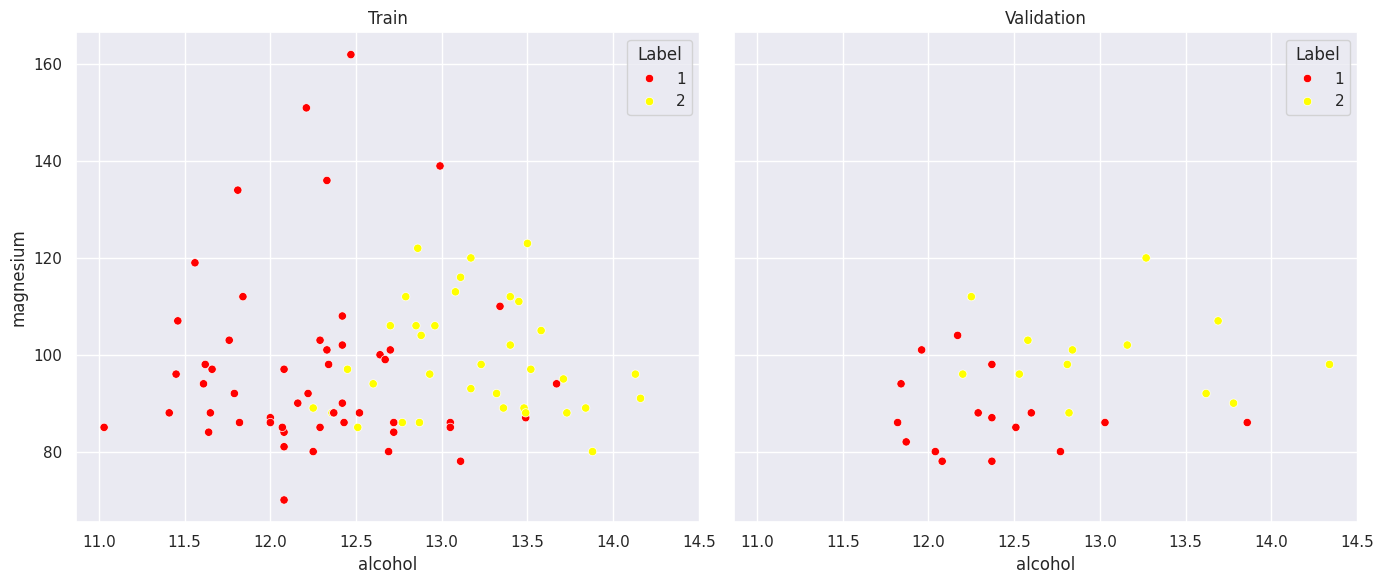

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Create a two plots figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Scatter plot for train set
sns.scatterplot(data=train_df, x='alcohol', y='magnesium', hue='target', palette='autumn', ax=axes[0])
axes[0].set_title("Train")
axes[0].legend(title='Label')

# Scatter plot for validation set
sns.scatterplot(data=val_df, x='alcohol', y='magnesium', hue='target', palette='autumn', ax=axes[1])
axes[1].set_title("Validation")
axes[1].legend(title='Label')

plt.tight_layout()
plt.show()

2

In [ ]:
import numpy as np
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC with fixed axis limits"""
    if ax is None:
        ax = plt.gca()

    # Fixed axis limits
    xlim = (X_train[:, 0].min() - 0.5, 14.5)   # alcohol
    ylim = (X_train[:, 1].min() - 5, 165)      # magnesium
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=50, linewidth=1, facecolors='none', edgecolor='black')


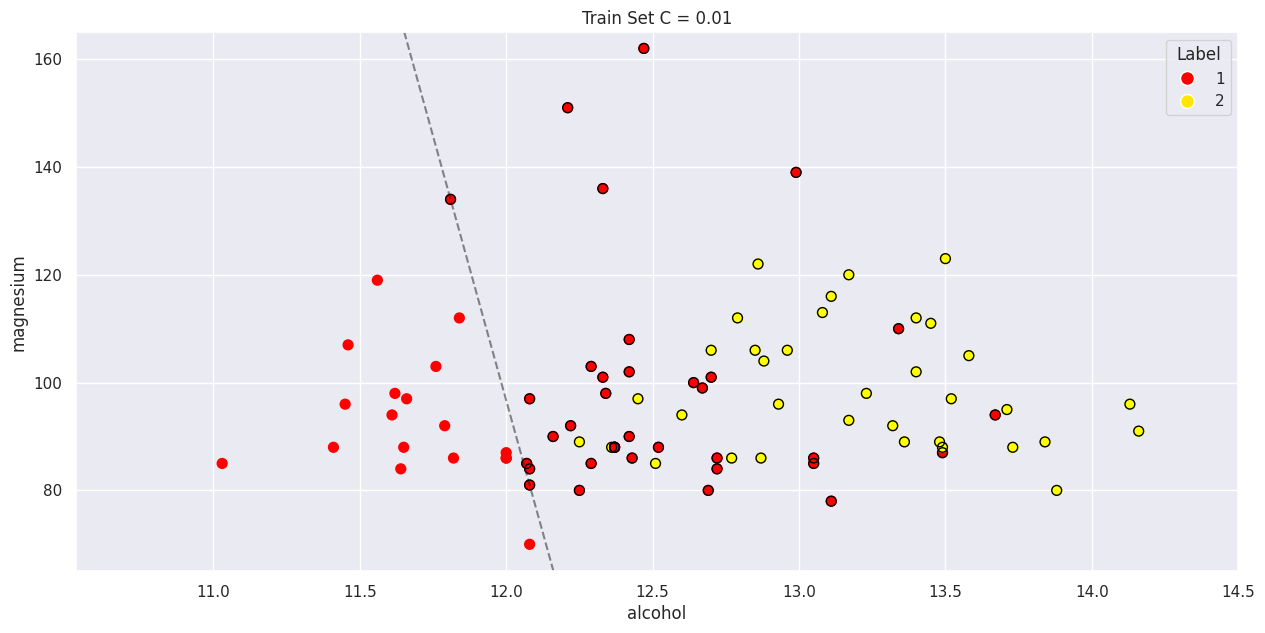

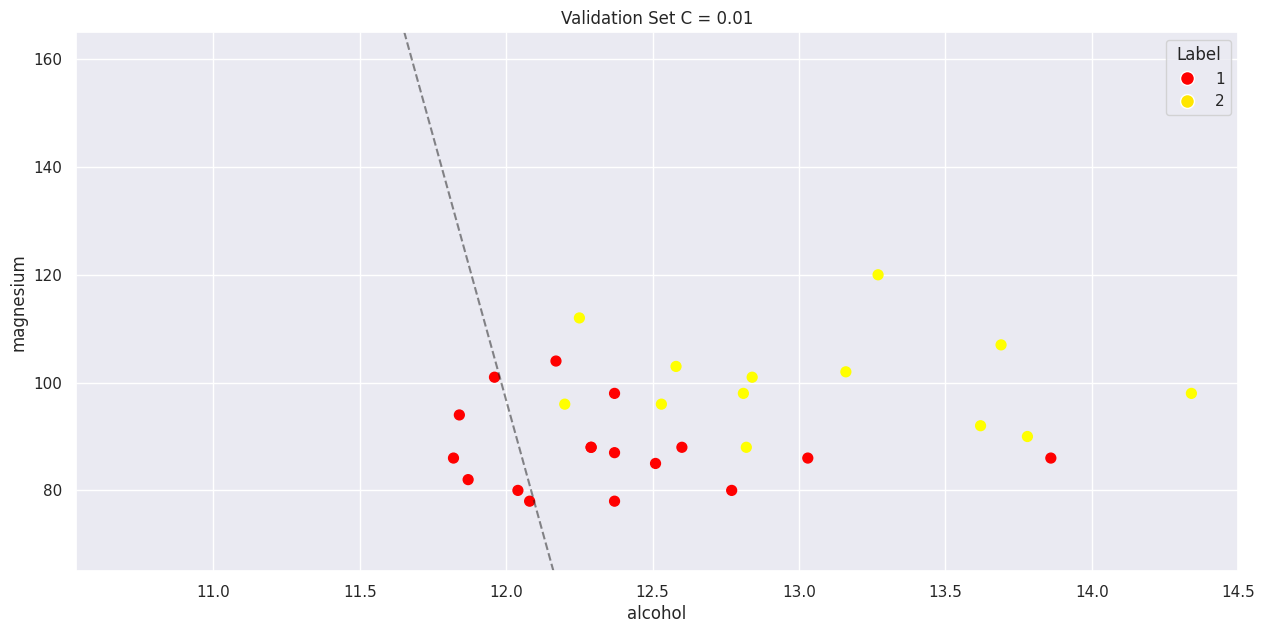

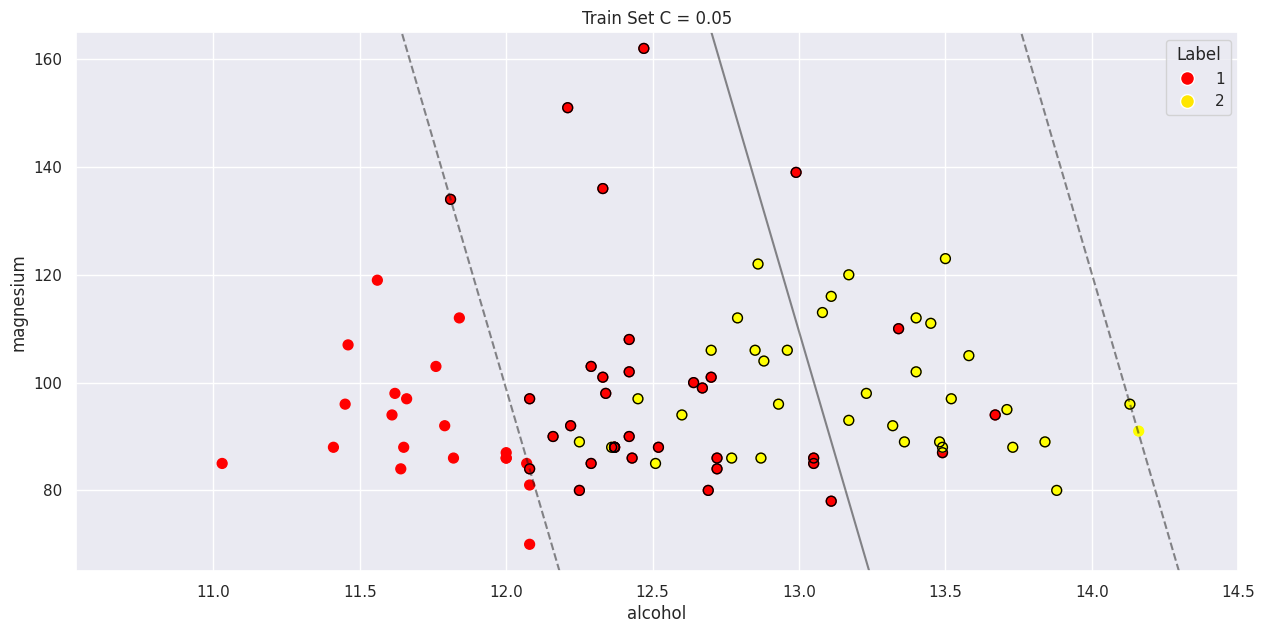

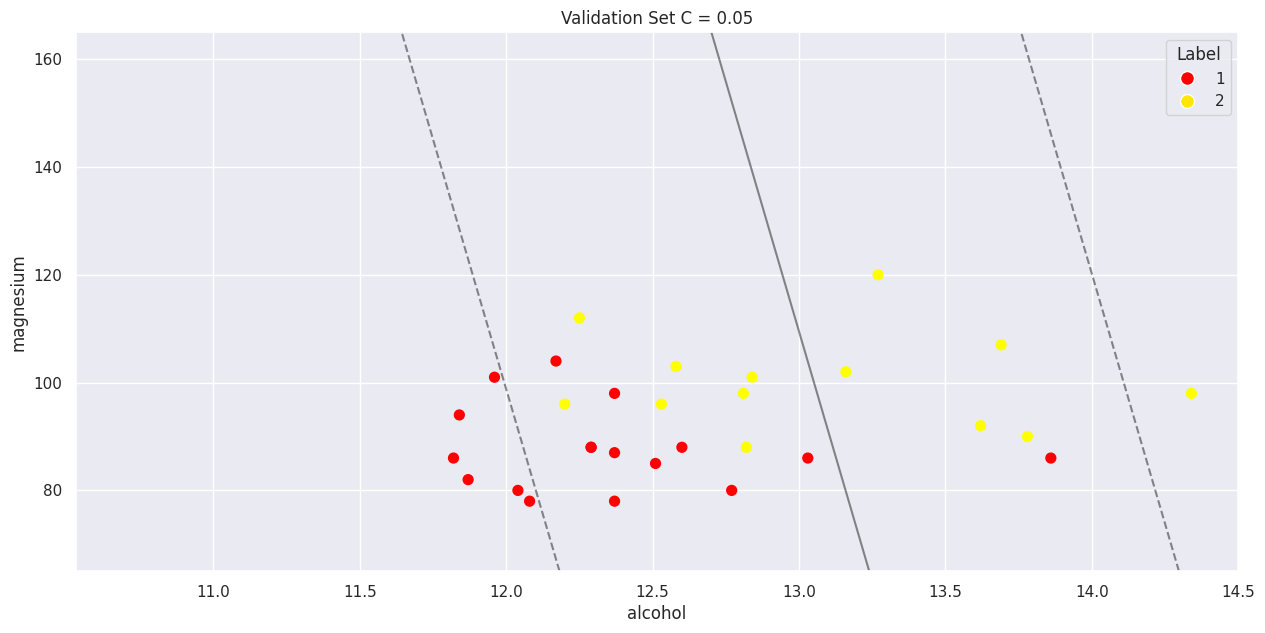

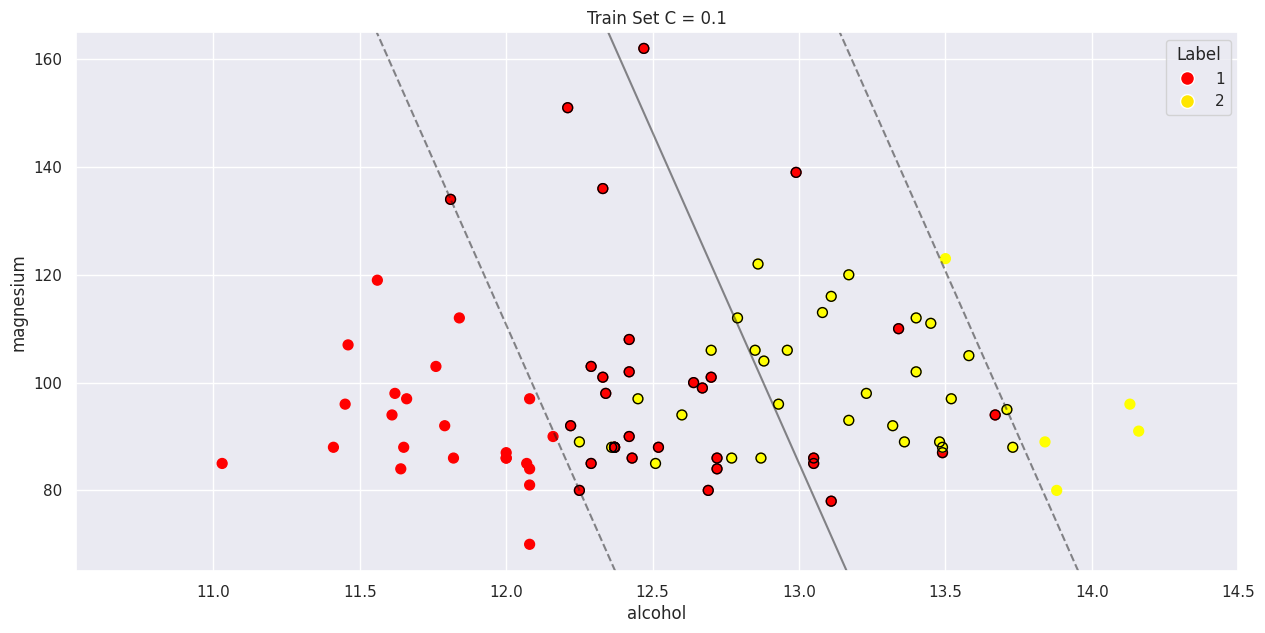

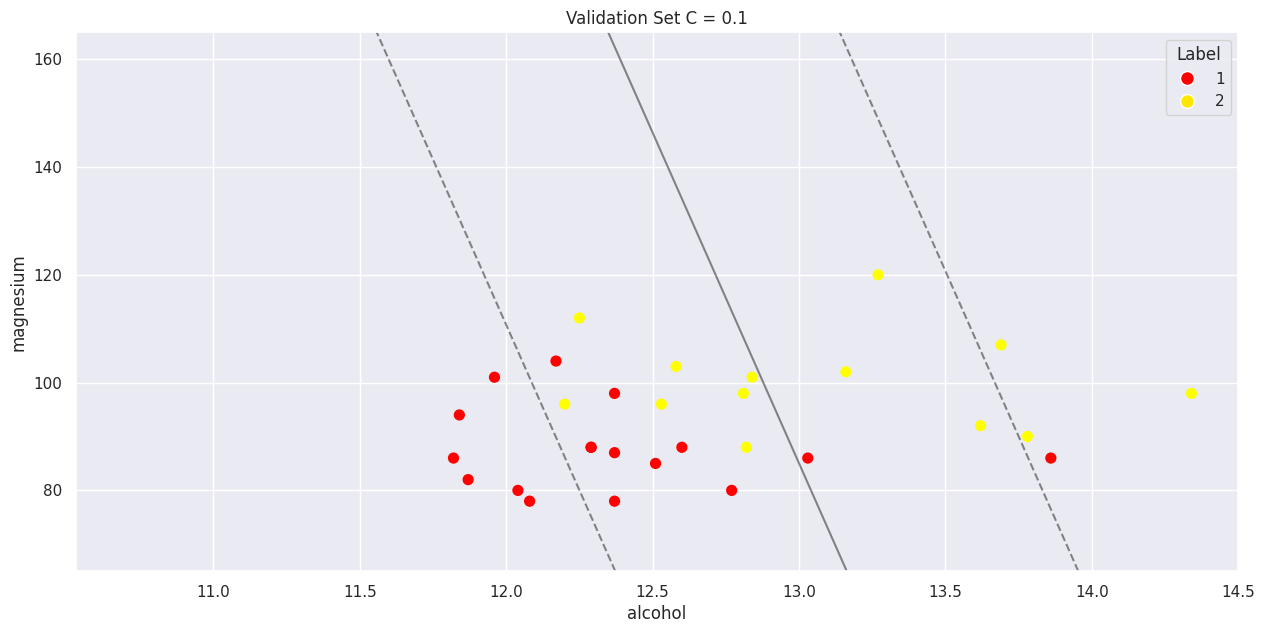

In [ ]:
from sklearn.svm import SVC
from matplotlib.lines import Line2D

X_train = train_df[['alcohol', 'magnesium']].values
y_train = train_df['target'].values
X_val = val_df[['alcohol', 'magnesium']].values
y_val = val_df['target'].values

# List of C values to explore
C_values = [0.01, 0.05, 0.1]

for C in C_values:
    # Model creation and fitting
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)

    # Plot for training set
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn', s=50)
    plot_svc_decision_function(model)

    # Manual legend using autumn colormap
    legend_elements = [
        Line2D([0], [0], marker='o', linestyle='None', color='w', label='1',
               markerfacecolor=plt.cm.autumn(0.0), markersize=10),
        Line2D([0], [0], marker='o', linestyle='None', color='w', label='2',
               markerfacecolor=plt.cm.autumn(0.9), markersize=10)
    ]
    ax.legend(handles=legend_elements, title="Label")
    ax.set_xlabel("alcohol")
    ax.set_ylabel("magnesium")
    ax.set_title(f"Train Set C = {C}")
    plt.grid(True)
    plt.savefig(f"train_plot_C_{C}.png")  # Save as image
    plt.show()

    # Plot for validation set
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='autumn', s=50)
    plot_svc_decision_function(model, plot_support=False)

    # Manual legend
    legend_elements = [
        Line2D([0], [0], marker='o', linestyle='None', color='w', label='1',
               markerfacecolor=plt.cm.autumn(0.0), markersize=10),
        Line2D([0], [0], marker='o', linestyle='None', color='w', label='2',
               markerfacecolor=plt.cm.autumn(0.9), markersize=10)
    ]
    ax.legend(handles=legend_elements, title="Label")
    ax.set_xlabel("alcohol")
    ax.set_ylabel("magnesium")
    ax.set_title(f"Validation Set C = {C}")
    plt.grid(True)
    plt.savefig(f"val_plot_C_{C}.png")  # Save as image
    plt.show()


4

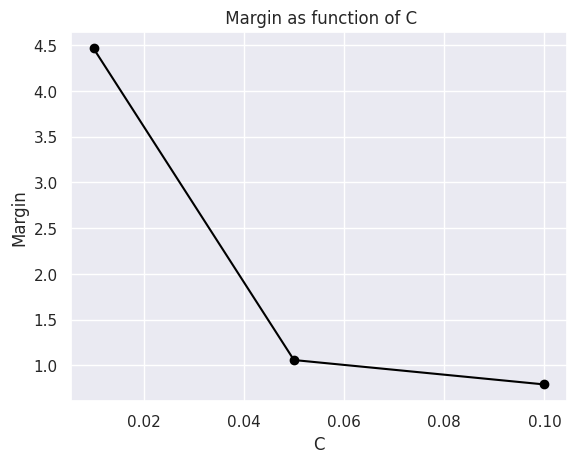

In [ ]:
# List to store margin values for each C
margin_values = []

# Loop over each C value and compute the margin
for C in C_values:
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)

    # Margin = 1 / ||w||, where w is the weight vector of the decision boundary
    margin = 1 / np.linalg.norm(model.coef_)
    margin_values.append(margin)

# Plot margin vs C
plt.plot(C_values, margin_values, c='Black', marker='o')
plt.xlabel('C')
plt.ylabel('Margin')
plt.title(" Margin as function of C")
plt.grid(True)
plt.show()

5

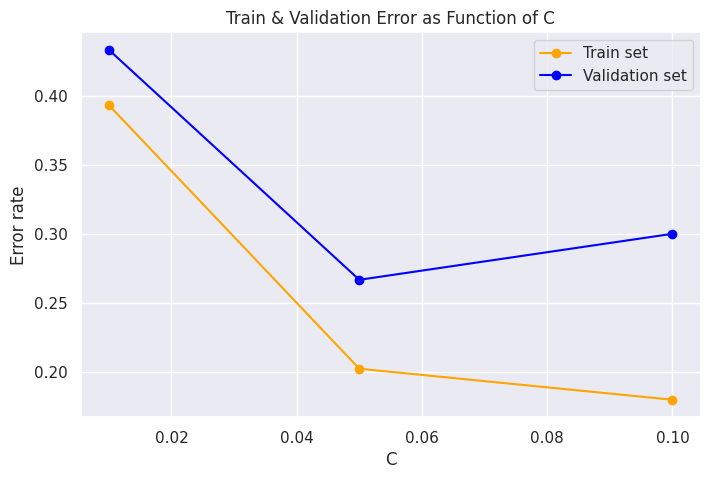

In [ ]:

# Lists to store error rates
train_error_list = []
validation_error_list = []

# Loop over C values and collect error rates
for C in C_values:
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)

    train_accuracy = model.score(X_train, y_train)
    val_accuracy = model.score(X_val, y_val)

    train_error = 1 - train_accuracy
    val_error = 1 - val_accuracy

    train_error_list.append(train_error)
    validation_error_list.append(val_error)

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(C_values, train_error_list, color='orange', marker='o', label='Train set')
ax.plot(C_values, validation_error_list, color='blue', marker='o', label='Validation set')
ax.set_xlabel('C')
ax.set_ylabel('Error rate')
ax.set_title('Train & Validation Error as Function of C')
ax.legend()
ax.grid(True)
plt.show()

6

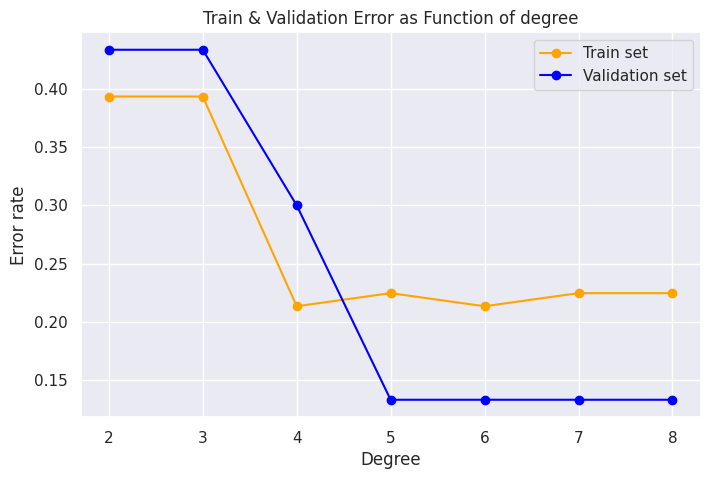

In [ ]:

# Lists to store error rates
train_error_list = []
validation_error_list = []
Degrees = list(range(2, 9))
# Loop over D values and collect error rates
for D in Degrees:
    model = SVC(kernel='poly', degree=D, C=1)
    model.fit(X_train, y_train)

    train_accuracy = model.score(X_train, y_train)
    val_accuracy = model.score(X_val, y_val)

    train_error = 1 - train_accuracy
    val_error = 1 - val_accuracy

    train_error_list.append(train_error)
    validation_error_list.append(val_error)

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(Degrees, train_error_list, color='orange', marker='o', label='Train set')
ax.plot(Degrees, validation_error_list, color='blue', marker='o', label='Validation set')
ax.set_xlabel('Degree')
ax.set_ylabel('Error rate')
ax.set_title('Train & Validation Error as Function of degree')
ax.legend()
ax.grid(True)
plt.show()

7

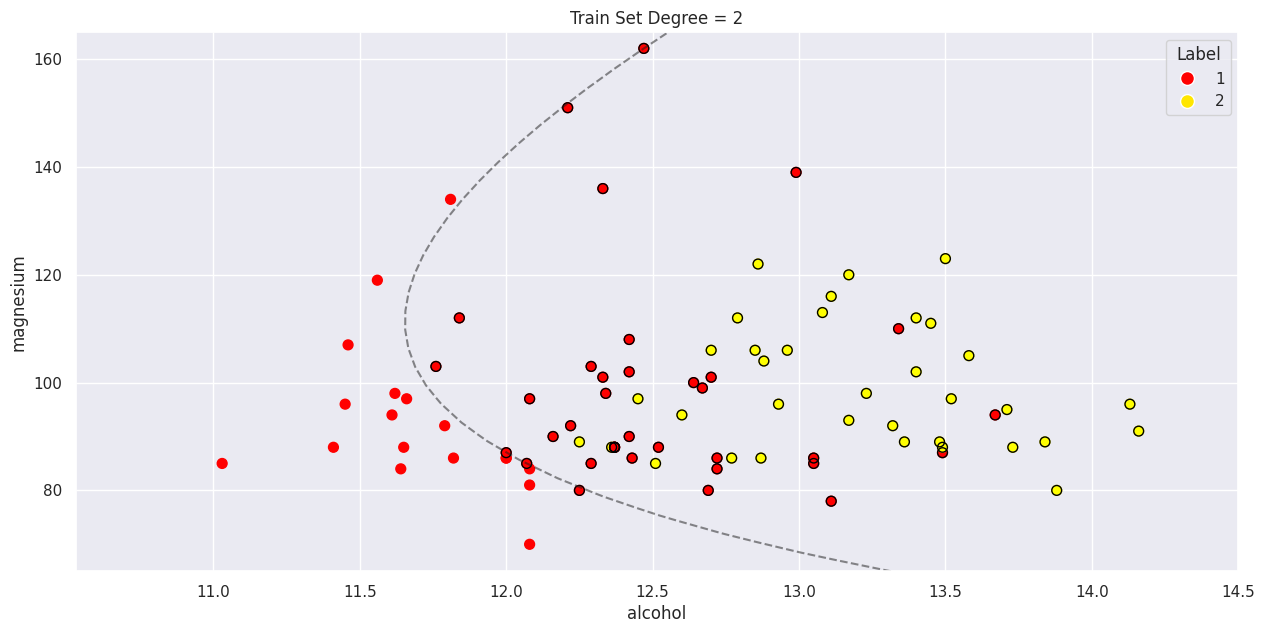

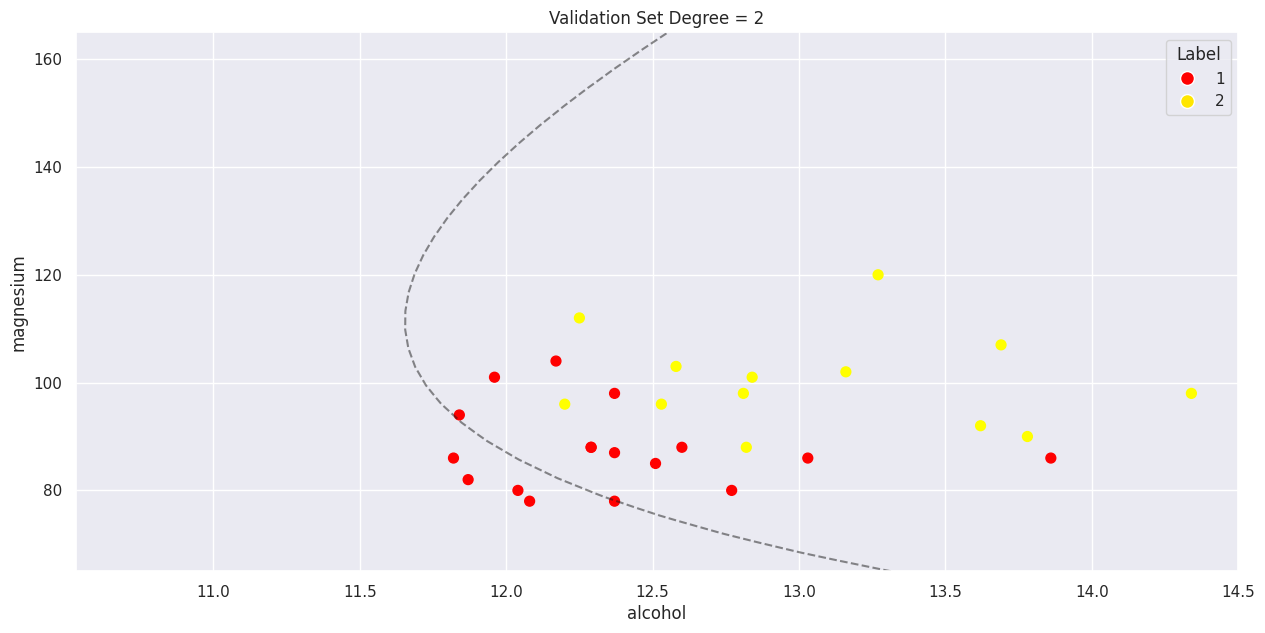

In [ ]:

# D = 2 which maximizes the error
# Model creation and fitting
model = SVC(kernel='poly', degree=2, C=1)
model.fit(X_train, y_train)

# Plot for training set
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn', s=50)
plot_svc_decision_function(model, ax=ax)

# Manual legend using autumn colormap
legend_elements = [
    Line2D([0], [0], marker='o', linestyle='None', color='w', label='1',
           markerfacecolor=plt.cm.autumn(0.0), markersize=10),
    Line2D([0], [0], marker='o', linestyle='None', color='w', label='2',
           markerfacecolor=plt.cm.autumn(0.9), markersize=10)
]
ax.legend(handles=legend_elements, title="Label")
ax.set_xlabel("alcohol")
ax.set_ylabel("magnesium")
ax.set_title("Train Set Degree = 2")
plt.grid(True)
plt.savefig("train_plot_D=2.png")  # Save as image
plt.show()

# Plot for validation set
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='autumn', s=50)
plot_svc_decision_function(model, ax=ax, plot_support=False)

# Manual legend
legend_elements = [
    Line2D([0], [0], marker='o', linestyle='None', color='w', label='1',
           markerfacecolor=plt.cm.autumn(0.0), markersize=10),
    Line2D([0], [0], marker='o', linestyle='None', color='w', label='2',
           markerfacecolor=plt.cm.autumn(0.9), markersize=10)
]
ax.legend(handles=legend_elements, title="Label")
ax.set_xlabel("alcohol")
ax.set_ylabel("magnesium")
ax.set_title("Validation Set Degree = 2")
plt.grid(True)
plt.savefig("val_plot_D=2.png")  # Save as image
plt.show()


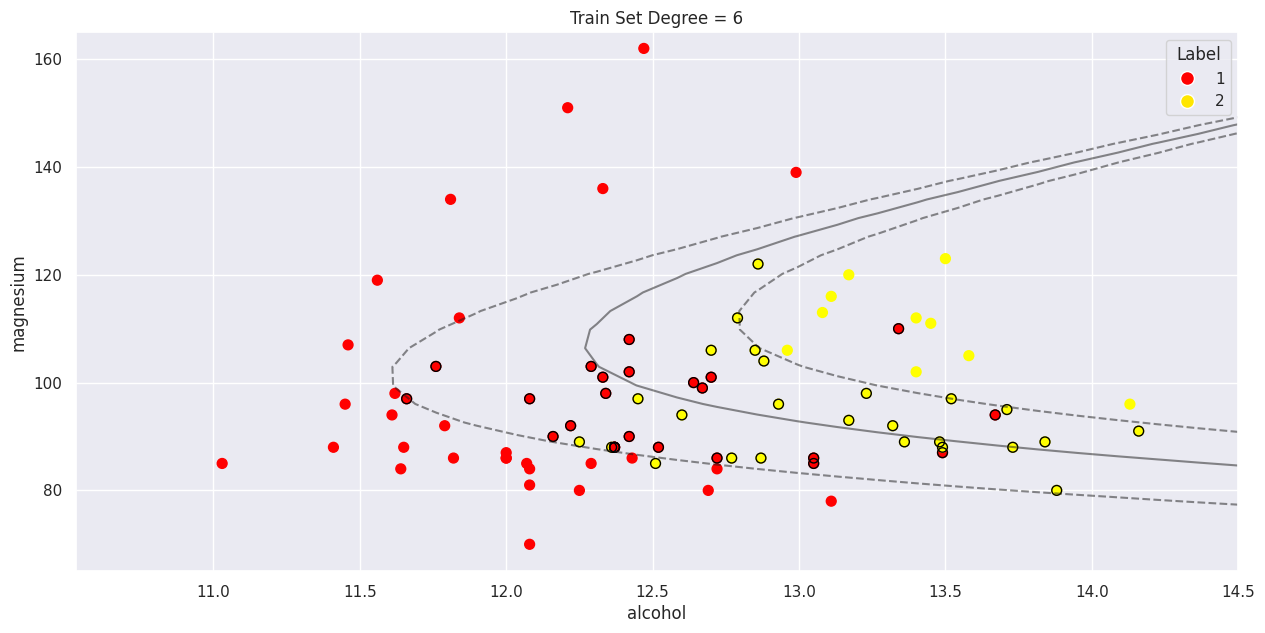

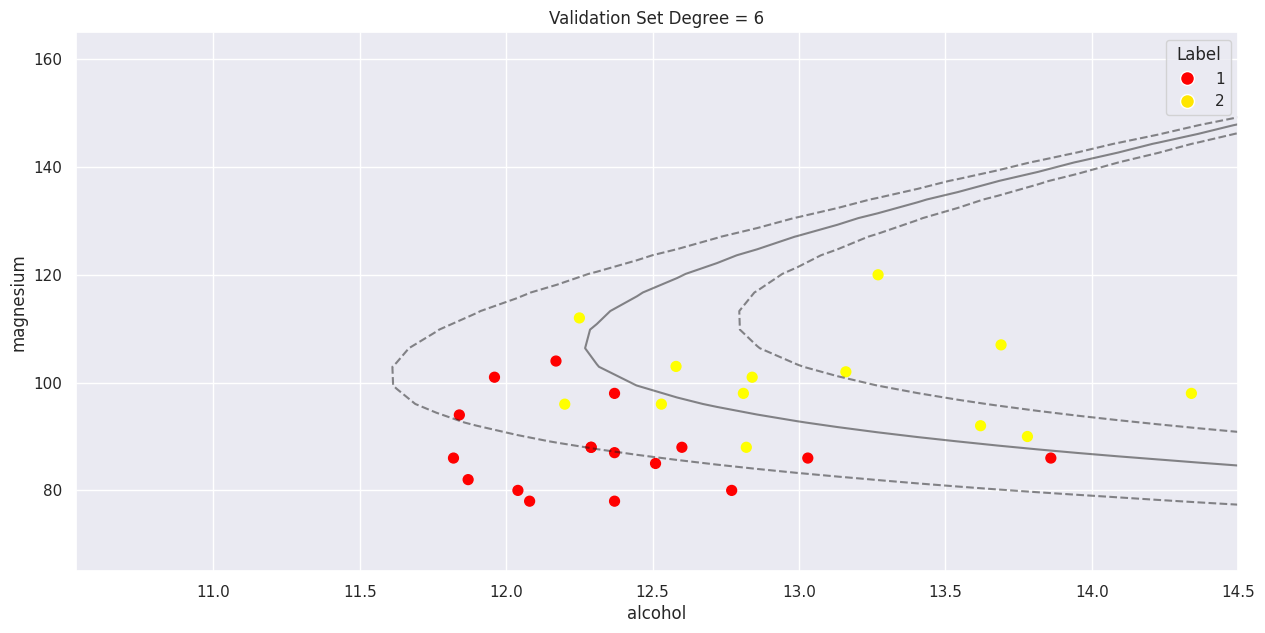

In [ ]:

# D = 6 which maximizes the error
# Model creation and fitting
model = SVC(kernel='poly', degree=6, C=1)
model.fit(X_train, y_train)

# Plot for training set
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn', s=50)
plot_svc_decision_function(model, ax=ax)

# Manual legend using autumn colormap
legend_elements = [
    Line2D([0], [0], marker='o', linestyle='None', color='w', label='1',
           markerfacecolor=plt.cm.autumn(0.0), markersize=10),
    Line2D([0], [0], marker='o', linestyle='None', color='w', label='2',
           markerfacecolor=plt.cm.autumn(0.9), markersize=10)
]
ax.legend(handles=legend_elements, title="Label")
ax.set_xlabel("alcohol")
ax.set_ylabel("magnesium")
ax.set_title("Train Set Degree = 6")
plt.grid(True)
plt.savefig("train_plot_D=6.png")  # Save as image
plt.show()

# Plot for validation set
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='autumn', s=50)
plot_svc_decision_function(model, ax=ax, plot_support=False)

# Manual legend
legend_elements = [
    Line2D([0], [0], marker='o', linestyle='None', color='w', label='1',
           markerfacecolor=plt.cm.autumn(0.0), markersize=10),
    Line2D([0], [0], marker='o', linestyle='None', color='w', label='2',
           markerfacecolor=plt.cm.autumn(0.9), markersize=10)
]
ax.legend(handles=legend_elements, title="Label")
ax.set_xlabel("alcohol")
ax.set_ylabel("magnesium")
ax.set_title("Validation Set Degree = 6")
plt.grid(True)
plt.savefig("val_plot_D=6.png")  # Save as image
plt.show()
